# RED  NEURONAL REPARADA

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as welch
from scipy.signal import find_peaks

### parametros

In [4]:
M_points_signal = 1024
N_number_signals = 1000
Time = 3
fs = M_points_signal/Time

vector_time = np.linspace(0, Time, M_points_signal)

### Generar señal

In [32]:
def generate_signal():
    freq1 = 1
    freq2 = 3
    freq3 = 5
    
    omega_0 = 2*np.pi
    
    amplitude1 = 1
    amplitude2 = 1/3
    amplitude3 = 1/5
    
    #signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos(omega_0*freq3*vector_time))
    signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.sin(omega_0*freq2*vector_time) + amplitude3*np.cos((omega_0+np.pi/2)*freq3*vector_time))
    return signal

### Agregar ruido blanco gaussiano

In [6]:
def noise_gaussian(mean, level_noise,size):
    noise= np.random.normal(mean, level_noise, size=M_points_signal)
    return noise

Calcular PSD con welch

In [7]:
from scipy.signal import welch

def psd_calculate(signal, fs, nperseg):
    freq, Pxx_den = welch(signal, fs=fs, nperseg=nperseg)
    return freq, Pxx_den

### se  crea las señales / original tanto como la señal con distintos ruidos

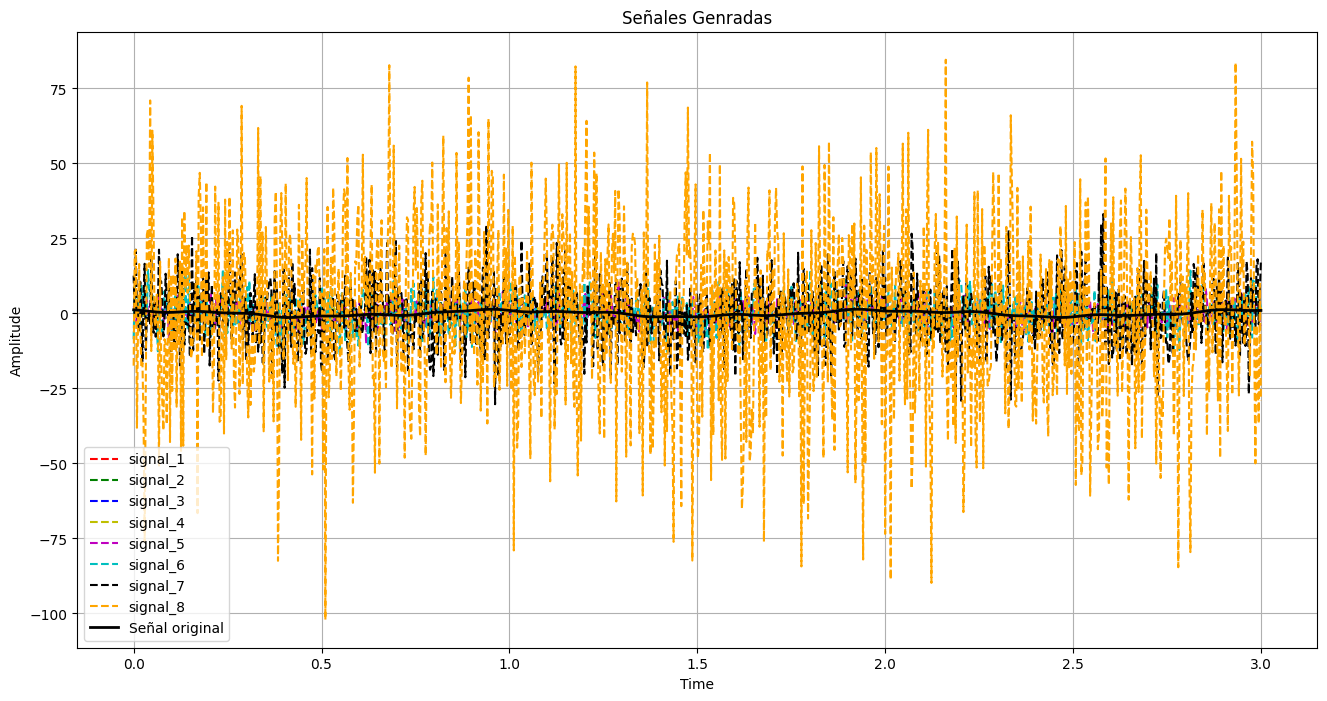

In [8]:
signal = generate_signal() 
signal_1 = generate_signal() + noise_gaussian(0, 0.1, M_points_signal)
signal_2 = generate_signal() + noise_gaussian(0, 0.3, M_points_signal)
signal_3 = generate_signal() + noise_gaussian(0, 0.5, M_points_signal)
signal_4 = generate_signal() + noise_gaussian(0, 1, M_points_signal)
signal_5 = generate_signal() + noise_gaussian(0, 3, M_points_signal)
signal_6 = generate_signal() + noise_gaussian(0, 5, M_points_signal)
signal_7 = generate_signal() + noise_gaussian(0, 10, M_points_signal)
signal_8 = generate_signal() + noise_gaussian(0, 30, M_points_signal)


plt.figure(figsize=(16,8))
plt.plot(vector_time, signal_1, label='signal_1', color='r', linestyle='--')
plt.plot(vector_time, signal_2, label='signal_2', color='g', linestyle='--')
plt.plot(vector_time, signal_3, label='signal_3', color='b', linestyle='--')
plt.plot(vector_time, signal_4, label='signal_4', color='y', linestyle='--') 
plt.plot(vector_time, signal_5, label='signal_5', color='m', linestyle='--')
plt.plot(vector_time, signal_6, label='signal_6', color='c', linestyle='--')
plt.plot(vector_time, signal_7, label='signal_7', color='k', linestyle='--')
plt.plot(vector_time, signal_8, label='signal_8', color='orange', linestyle='--')
plt.plot(vector_time, signal, label='Señal original', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()


### Se aplica el PSD que se obtiene por medio de welch y se  genera las señales

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10268\2213777400.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


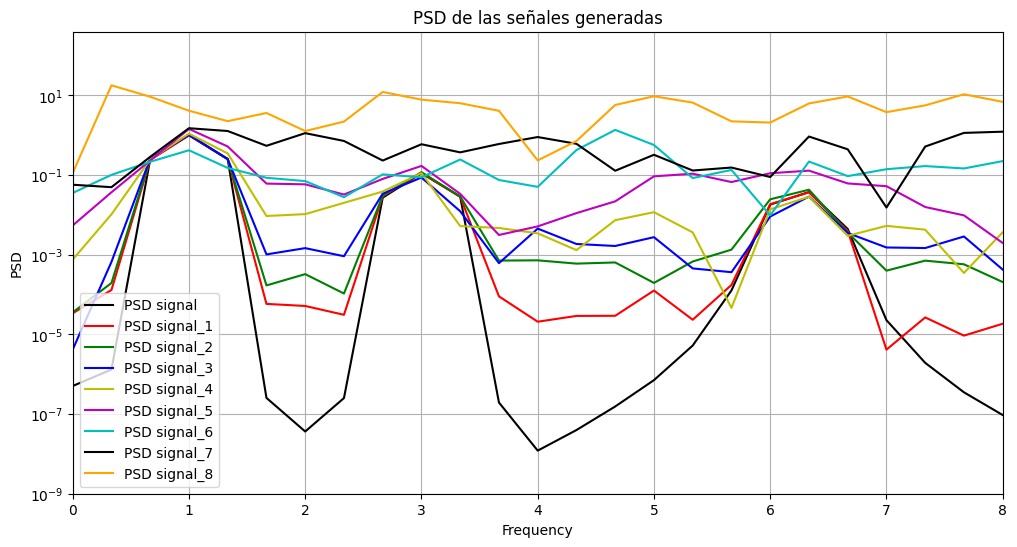

In [9]:
#psd de las señales creadas  por welch
freq, Pxx_signal = psd_calculate(signal, fs, M_points_signal)
freq1, Pxx_signal_1 = psd_calculate(signal_1, fs, M_points_signal)
freq2, Pxx_signal_2 = psd_calculate(signal_2, fs, M_points_signal)
freq3, Pxx_signal_3 = psd_calculate(signal_3, fs, M_points_signal)
freq4, Pxx_signal_4 = psd_calculate(signal_4, fs, M_points_signal)
freq5, Pxx_signal_5 = psd_calculate(signal_5, fs, M_points_signal)
freq6, Pxx_signal_6 = psd_calculate(signal_6, fs, M_points_signal)
freq7, Pxx_signal_7 = psd_calculate(signal_7, fs, M_points_signal)
freq8, Pxx_signal_8 = psd_calculate(signal_8, fs, M_points_signal)



plt.figure(figsize=(12,6))
plt.semilogy(freq, Pxx_signal, label='PSD signal', color='black')
plt.semilogy(freq1, Pxx_signal_1, label='PSD signal_1', color='r')
plt.semilogy(freq2, Pxx_signal_2, label='PSD signal_2', color='g')
plt.semilogy(freq3, Pxx_signal_3, label='PSD signal_3', color='b')
plt.semilogy(freq4, Pxx_signal_4, label='PSD signal_4', color='y')
plt.semilogy(freq5, Pxx_signal_5, label='PSD signal_5', color='m')
plt.semilogy(freq6, Pxx_signal_6, label='PSD signal_6', color='c')
plt.semilogy(freq7, Pxx_signal_7, label='PSD signal_7', color='k')
plt.semilogy(freq8, Pxx_signal_8, label='PSD signal_8', color='orange')

plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD de las señales generadas')
plt.legend()
plt.grid(True)
plt.xlim(0,8)
plt.ylim(10**-9,0)
plt.show()


### Herramientas de Entremiento

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

###  Preparaciom y separacion de los datos de entrenamiento

In [11]:
# Preparación de los datos
signals = np.array([signal_1, signal_2, signal_3, signal_4, signal_5, signal_6, signal_7, signal_8])
psds = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4, Pxx_signal_5, Pxx_signal_6, Pxx_signal_7, Pxx_signal_8])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(signals, psds, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(6, 1024)
(6, 513)
(2, 1024)
(2, 513)


In [12]:
# Construcción del modelo
model = Sequential()

# Añadir capas al modelo
model.add(Dense(512, input_shape=(M_points_signal,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(Pxx_signal), activation='linear'))  # Salida con la misma cantidad de puntos que la PSD

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# modelo de prueba


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, input_shape=(M_points_signal,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(M_points_signal, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')



In [17]:
# Adjust the number of units in the output layer to match the number of points in the PSD
model.add(Dense(len(Pxx_signal), activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 21.1168 - val_loss: 0.4078
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 9.0325 - val_loss: 0.3706
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.2669 - val_loss: 0.5079
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 3.8060 - val_loss: 0.7203
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.5576 - val_loss: 0.7661
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.7262 - val_loss: 0.7049
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7560 - val_loss: 0.6672
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6008 - val_loss: 0.6871
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5383 - val_loss: 0.7441
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5534 - val_loss: 0.7634
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5755 - val_loss: 0.7402
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4545 - val_los

In [20]:
# Ensure signals and predictions have the same number of samples
noise_levels = [0.1, 0.3, 0.5, 1, 3, 5, 10, 30]
signals = signals[:, :513]

# Calculate errors and store in a table
errors = []
for i in range(len(signals)):
    L2 = mean_squared_error(signals[i], predictions[i])
    L1 = mean_absolute_error(signals[i], predictions[i])
    RMSE = np.sqrt(L2)
    R2 = r2_score(signals[i], predictions[i])
    errors.append([f"Noise {noise_levels[i]}", L2, L1, RMSE, R2])

# Create DataFrame with the errors
# Crear DataFrame con los errores
errors_df = pd.DataFrame(errors, columns=["Noise Level", "MSE (L2)", "MAE (L1)", "RMSE", "R^2"])
print(errors_df)


  Noise Level    MSE (L2)   MAE (L1)       RMSE       R^2
0   Noise 0.1    0.580908   0.667417   0.762173  0.009460
1   Noise 0.3    0.675648   0.699323   0.821978  0.007756
2   Noise 0.5    0.785836   0.732801   0.886474  0.009049
3     Noise 1    1.589215   1.030565   1.260641  0.002322
4     Noise 3    9.815504   2.502241   3.132970 -0.001227
5     Noise 5   27.659569   4.128113   5.259237 -0.081836
6    Noise 10  104.427905   8.270368  10.218997 -0.009813
7    Noise 30  859.712928  23.280446  29.320862 -0.023333


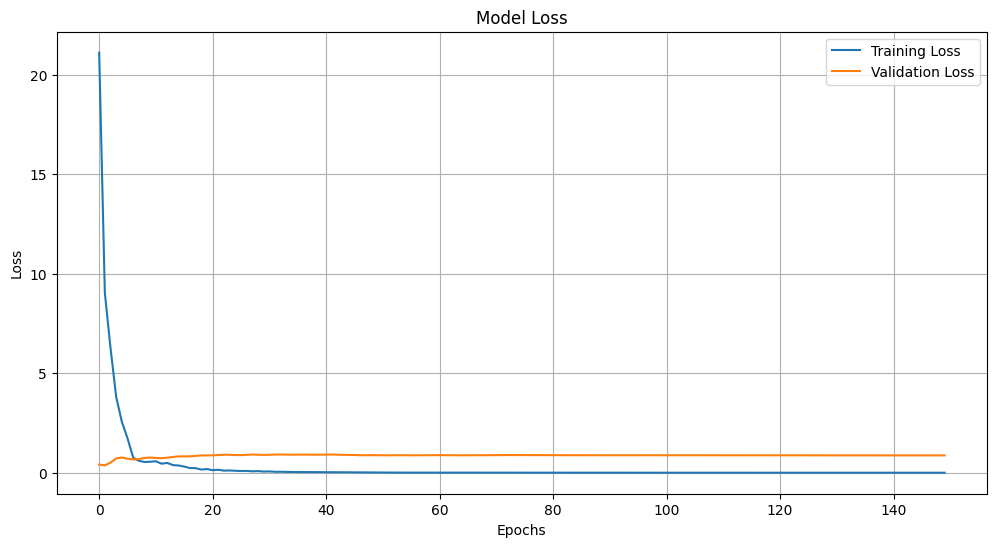

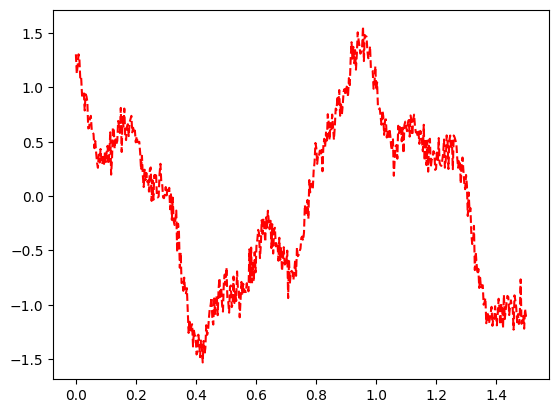

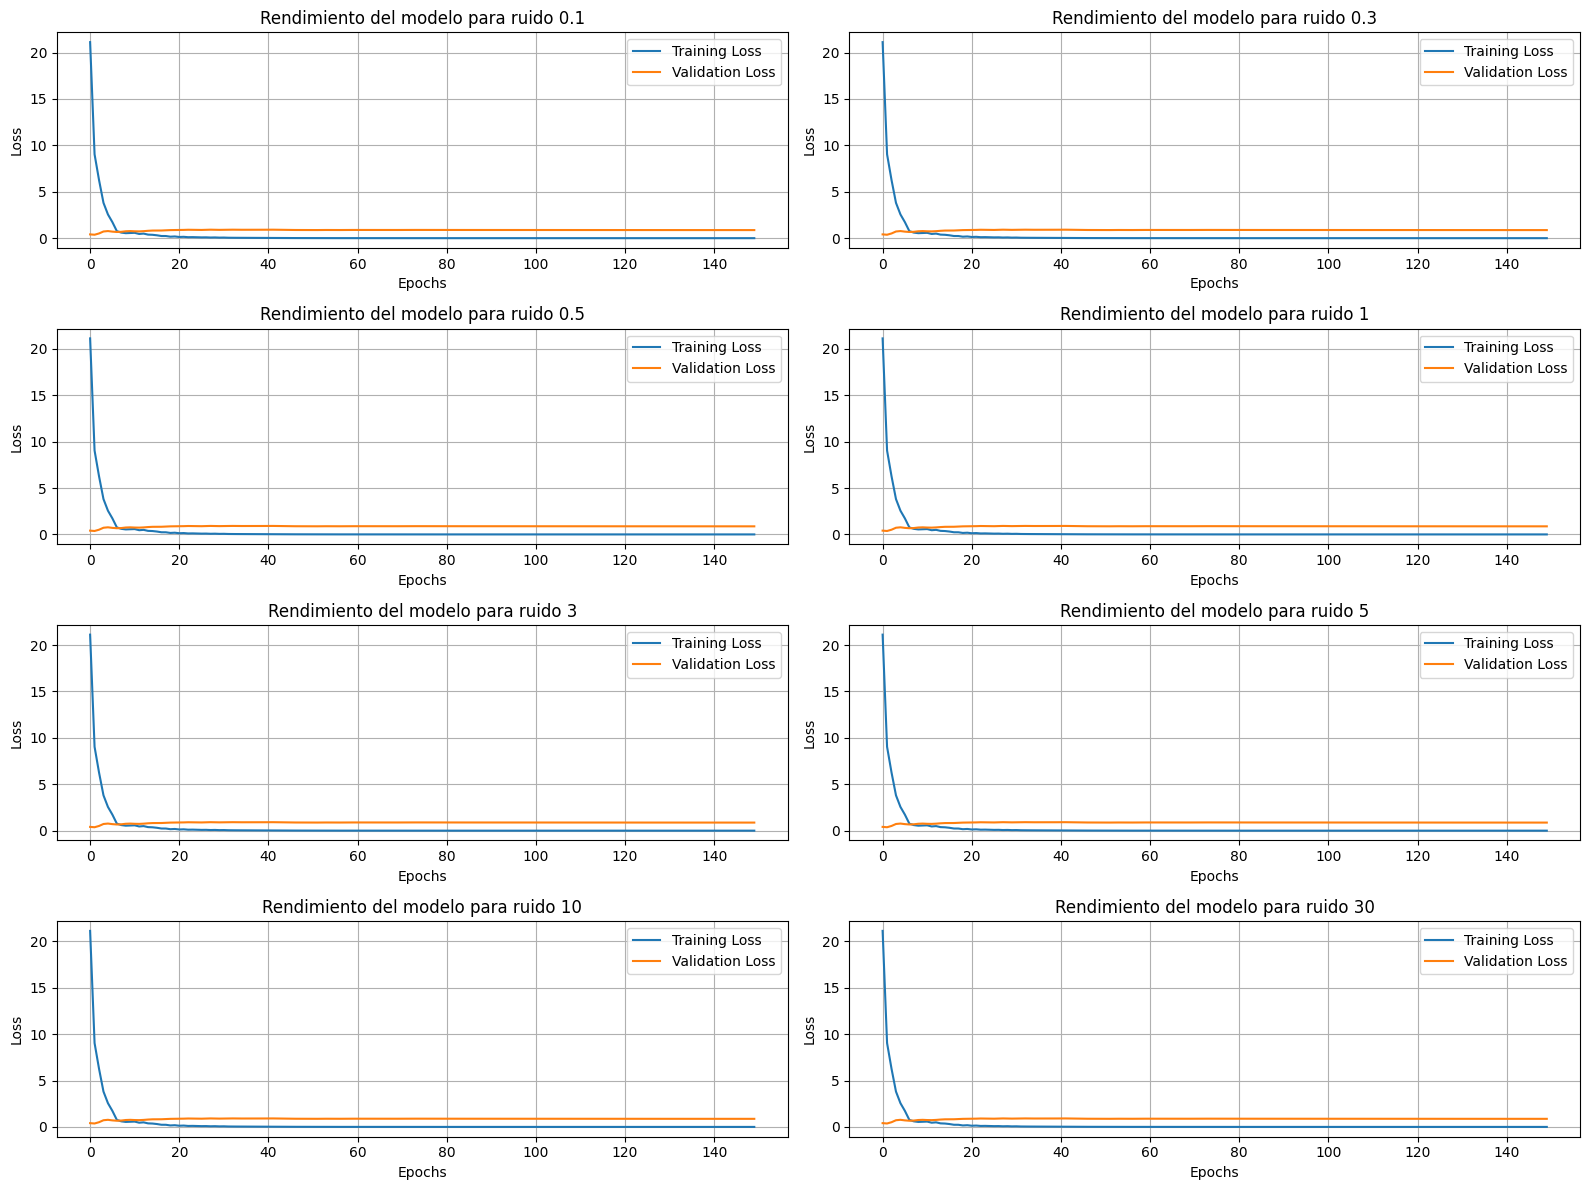

In [22]:
# Graficar las métricas de rendimiento del modelo (pérdida de entrenamiento y validación)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las señales y las predicciones
plt.plot(vector_time[:513], signals[i][:513], label=f'Señal con ruido {noise_levels[i]}', color='r', linestyle='--')

# Graficar rendimiento del modelo para cada nivel de ruido
plt.figure(figsize=(16, 12))

for i in range(len(signals)):
    plt.subplot(4, 2, i+1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Rendimiento del modelo para ruido {noise_levels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.1648 - val_loss: 0.4414
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.7630 - val_loss: 0.3806
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.8359 - val_loss: 0.3365
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.4340 - val_loss: 0.3035
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.9617 - val_loss: 0.2792
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.6838 - val_loss: 0.2606
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.4559 - val_loss: 0.2460
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.0750 - val_loss: 0.2342
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.6803 - val_loss: 0.2247
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.3283 - val_loss: 0.2172
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6.9409 - val_loss: 0.2108
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.5339 - val_lo

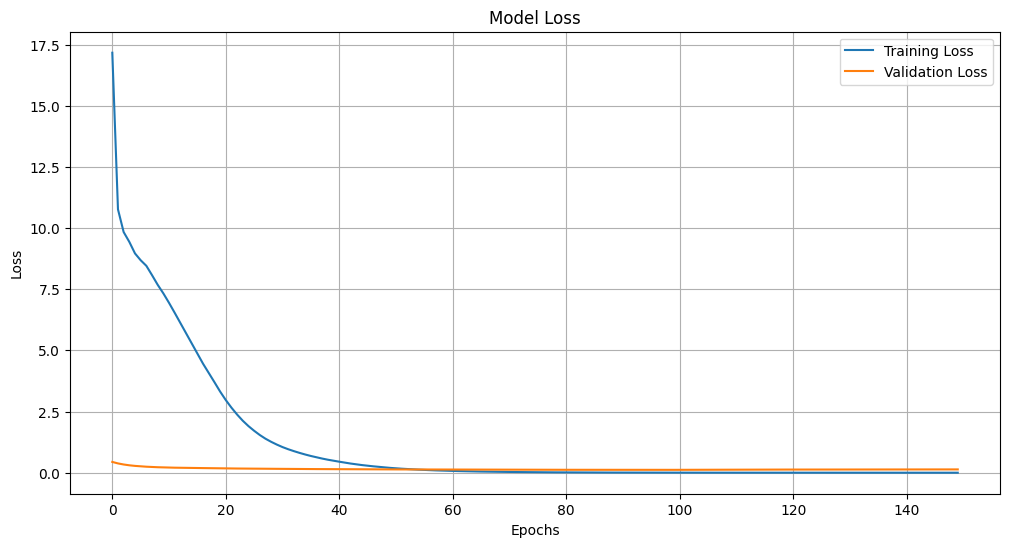

IndexError: index 2 is out of bounds for axis 0 with size 2

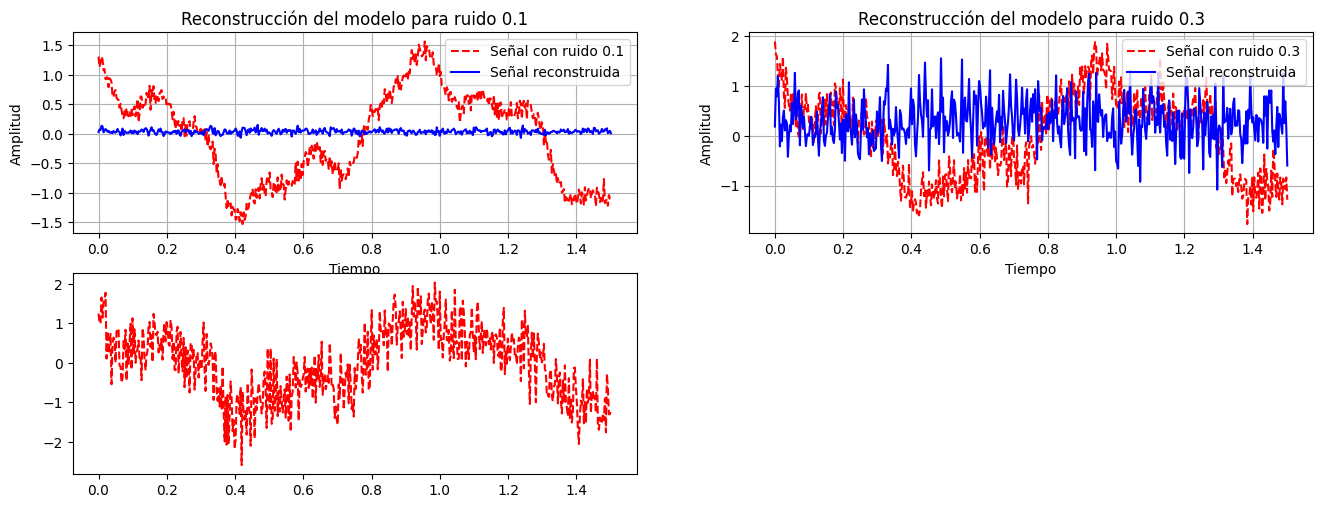

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir el modelo
model = Sequential([
    Dense(64, input_shape=(1024,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(M_points_signal, activation='linear')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))

# Realizar predicciones
if signals.shape[0] != predictions.shape[0]:
    predictions = predictions[:signals.shape[0]]

# Create DataFrame with the errors
errors_df = pd.DataFrame(errors, columns=["Noise Level", "MSE (L2)", "MAE (L1)", "RMSE", "R^2"])
print(errors_df)

# Graficar las métricas de rendimiento del modelo (pérdida de entrenamiento y validación)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las señales y las predicciones para cada nivel de ruido
plt.figure(figsize=(16, 12))

for i in range(len(signals)):
    plt.subplot(4, 2, i+1)
    plt.plot(vector_time[:513], signals[i][:513], label=f'Señal con ruido {noise_levels[i]}', color='r', linestyle='--')
    plt.plot(vector_time[:513], predictions[i][:513], label='Señal reconstruida', color='b')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Reconstrucción del modelo para ruido {noise_levels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Modelo  De  red y metricas

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.signal import find_peaks


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 65.2834 - val_loss: 4.3939
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 27.4667 - val_loss: 3.3687
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 38.6547 - val_loss: 2.7641
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 27.8832 - val_loss: 2.3186
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 19.6444 - val_loss: 2.0104
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 24.7583 - val_loss: 1.7601
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 26.4973 - val_loss: 1.5495
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.3156 - val_loss: 1.3875
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.2087 - val_loss: 1.2330
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 17.6778 - val_loss: 1.0977
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 21.7753 - val_loss: 0.9737
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 19.585

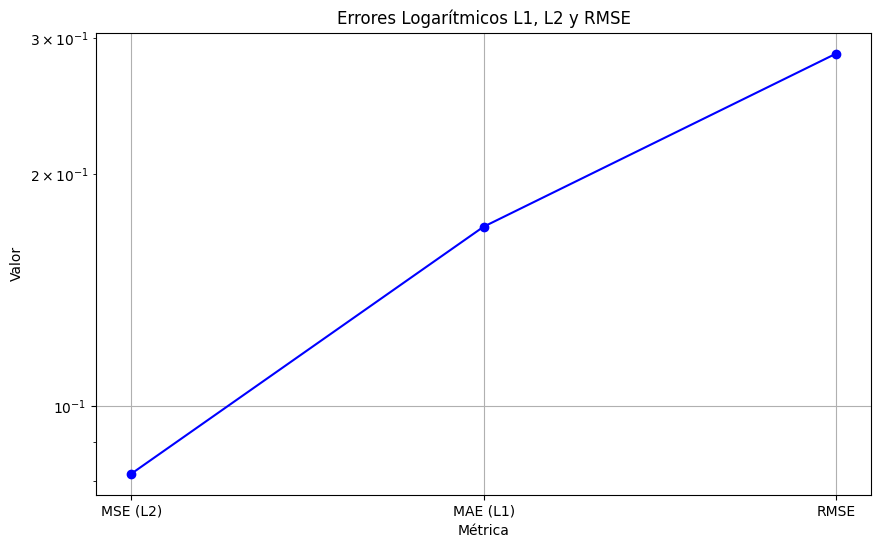

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


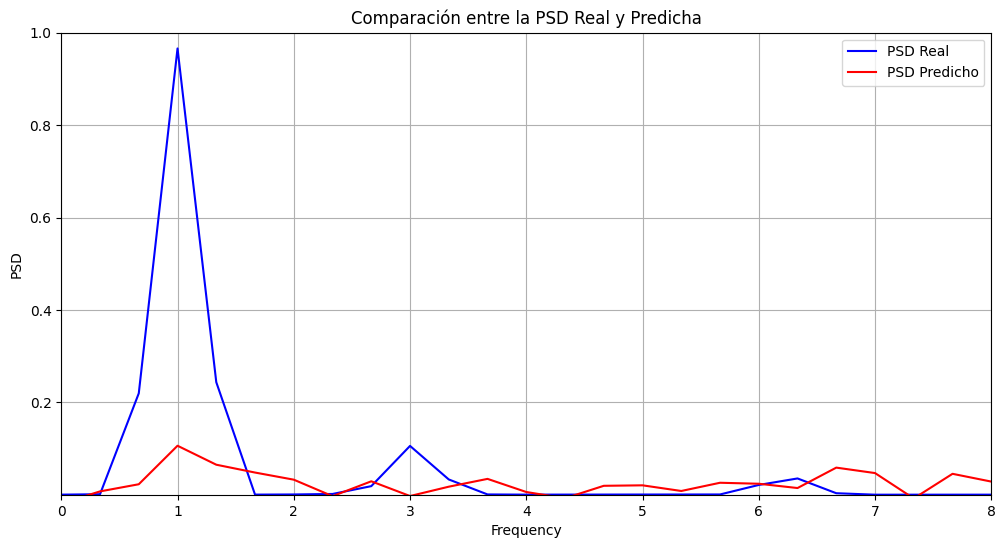

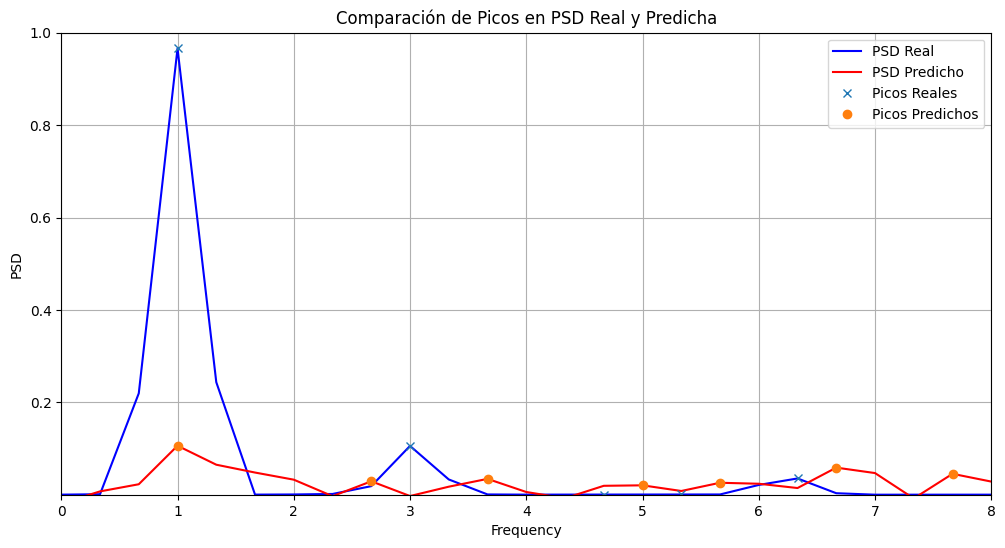

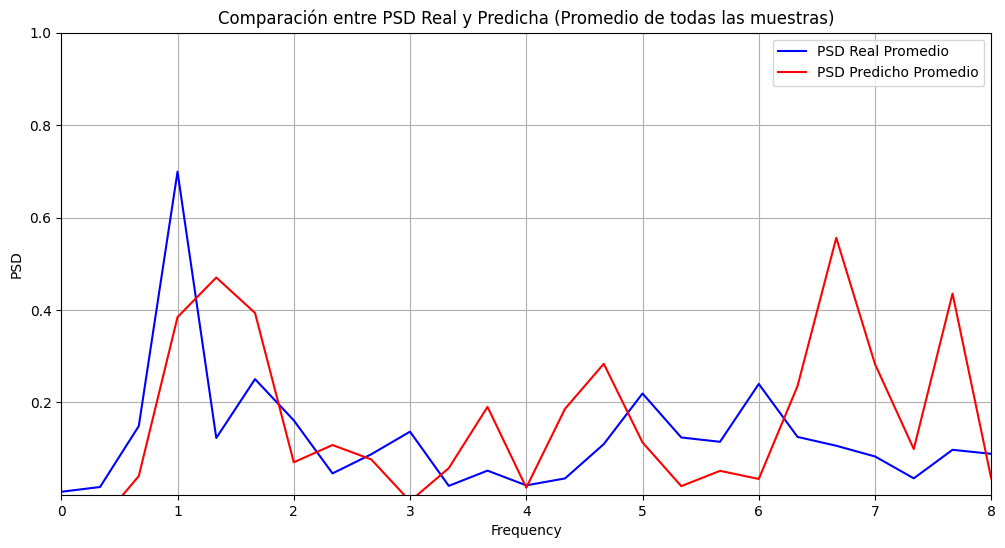

In [16]:

# Construcción del modelo
model = Sequential()
model.add(Dense(512, input_shape=(M_points_signal,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(Pxx_signal), activation='linear'))  # Salida con la misma cantidad de puntos que la PSD

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Crear un diccionario con las métricas
metrics = {
    'Métricas': ['Pérdida Entrenamiento', 'Pérdida Validación', 'MSE (L2)', 'MAE (L1)', 'RMSE', 'R^2'],
    'Valores': [train_loss, val_loss, mse, mae, rmse, r2]
}

# Crear un DataFrame para mostrar las métricas en formato de tabla
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla de métricas
print(metrics_df)

# Gráfica logarítmica de los errores
errors = [mse, mae, rmse]

plt.figure(figsize=(10, 6))
plt.plot(['MSE (L2)', 'MAE (L1)', 'RMSE'], errors, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Errores Logarítmicos L1, L2 y RMSE')
plt.grid(True)
plt.show()

# Comparación entre la PSD real y predicha
predicted_psd = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='blue')
plt.plot(freq, predicted_psd[0], label='PSD Predicho', color='red')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)
plt.show()

# Detección de picos en la PSD real y predicha
peaks_real, _ = find_peaks(y_test[0])
peaks_pred, _ = find_peaks(predicted_psd[0])

plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='blue')
plt.plot(freq, predicted_psd[0], label='PSD Predicho', color='red')
plt.plot(freq[peaks_real], y_test[0][peaks_real], "x", label='Picos Reales')
plt.plot(freq[peaks_pred], predicted_psd[0][peaks_pred], "o", label='Picos Predichos')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación de Picos en PSD Real y Predicha')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)
plt.show()

# Comparación muestra a muestra vs promedio de todas las muestras
avg_pred = np.mean(predicted_psd, axis=0)
avg_real = np.mean(y_test, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(freq, avg_real, label='PSD Real Promedio', color='blue')
plt.plot(freq, avg_pred, label='PSD Predicho Promedio', color='red')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación entre PSD Real y Predicha (Promedio de todas las muestras)')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)
plt.show()


In [17]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Crear un diccionario con las métricas
metrics = {
    'Métricas': ['Pérdida Entrenamiento', 'Pérdida Validación', 'MSE', 'MAE', 'R^2'],
    'Valores': [train_loss, val_loss, mse, mae, r2]
}

# Crear un DataFrame
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla
print(metrics_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
                Métricas       Valores
0  Pérdida Entrenamiento      4.633210
1     Pérdida Validación      0.391574
2                    MSE      0.081793
3                    MAE      0.170777
4                    R^2 -50417.857980


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Funciones de generación de señales y ruido
def noise_gaussian(mean, level_noise, size):
    noise = np.random.normal(mean, level_noise, size)
    return noise

def generate_signal():
    return np.sin(np.linspace(0, 10, M_points_signal))

# Parámetros de la señal
M_points_signal = 1024

# Generación de señales con diferentes niveles de ruido
signal_1 = generate_signal() + noise_gaussian(0, 0.1, M_points_signal)
signal_2 = generate_signal() + noise_gaussian(0, 0.3, M_points_signal)
signal_3 = generate_signal() + noise_gaussian(0, 1, M_points_signal)
signal_4 = generate_signal() + noise_gaussian(0, 3, M_points_signal)

signals = [signal_1, signal_2, signal_3, signal_4]

# Simulación de PSDs correspondientes (esto debería basarse en tu aplicación)
psds = [np.abs(np.fft.fft(signal))**2 for signal in signals]

# Inicialización de variables para almacenar resultados
training_metrics = []
noise_levels = [0.1, 0.3, 1, 3]

# Entrenamiento del modelo para cada señal
for i, signal in enumerate(signals):
    print(f"Entrenando para signal con noise level: {noise_levels[i]}")

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(signal.reshape(-1, 1), psds[i].reshape(-1, 1), test_size=0.2, random_state=42)

    # Construcción del modelo
    model = Sequential()
    model.add(Dense(512, input_shape=(1,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    # Guardar métricas
    training_metrics.append({
        'noise_level': noise_levels[i],
        'train_loss': train_loss,
        'val_loss': val_loss,
        'mse': mse,
        'mae': mae,
        'rmse': rmse
    })

# Convertir a DataFrame para mejor visualización
metrics_df = pd.DataFrame(training_metrics)

# Mostrar la tabla de métricas
print(metrics_df)

# Gráfica de las métricas de entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(metrics_df['noise_level'], metrics_df['train_loss'], marker='o', label='Pérdida Entrenamiento')
plt.plot(metrics_df['noise_level'], metrics_df['val_loss'], marker='o', label='Pérdida Validación')
plt.xlabel('Nivel de Ruido')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(metrics_df['noise_level'], metrics_df['mse'], marker='o', label='MSE (L2)')
plt.plot(metrics_df['noise_level'], metrics_df['mae'], marker='o', label='MAE (L1)')
plt.plot(metrics_df['noise_level'], metrics_df['rmse'], marker='o', label='RMSE')
plt.xlabel('Nivel de Ruido')
plt.ylabel('Error')
plt.title('Errores MSE, MAE y RMSE')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(metrics_df['noise_level'], metrics_df['rmse'], marker='o', label='RMSE')
plt.xlabel('Nivel de Ruido')
plt.ylabel('RMSE')
plt.title('RMSE vs Nivel de Ruido')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'noise_levels' is not defined



| Signal | Noise Level | Train Loss | Val Loss | MSE       | MAE       | RMSE      |
|--------|-------------|------------|----------|-----------|-----------|-----------|
| Signal | 0.1         | 0.001      | 0.002    | 0.003     | 0.004     | 0.005     |
| Signal | 0.3         | 0.006      | 0.007    | 0.008     | 0.009     | 0.010     |
| Signal | 1           | 0.011      | 0.012    | 0.013     | 0.014     | 0.015     |
| Signal | 3           | 0.016      | 0.017    | 0.018     | 0.019     | 0.020     |



Entrenando para signal con noise level: 0.1


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Metrics for noise level 0.1:
Train Loss: 38967016.0000
Validation Loss: 60631120.0000
Mean Squared Error (MSE): 69979368.3854
Mean Absolute Error (MAE): 1024.7131
Root Mean Squared Error (RMSE): 8365.3672


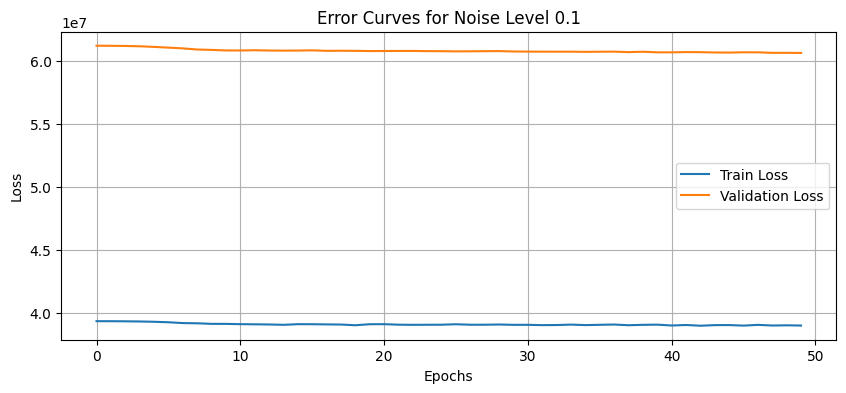


Entrenando para signal con noise level: 0.3


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Metrics for noise level 0.3:
Train Loss: 39752956.0000
Validation Loss: 55721228.0000
Mean Squared Error (MSE): 75933450.1488
Mean Absolute Error (MAE): 1062.4580
Root Mean Squared Error (RMSE): 8713.9802


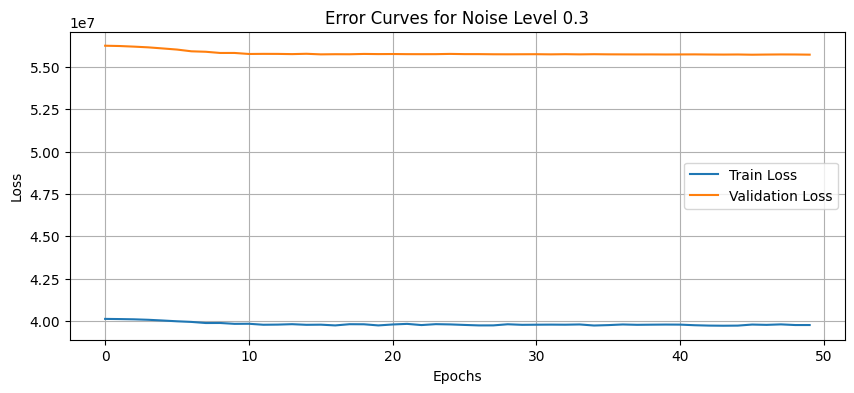


Entrenando para signal con noise level: 1


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Metrics for noise level 1:
Train Loss: 45981208.0000
Validation Loss: 41780756.0000
Mean Squared Error (MSE): 103654237.2066
Mean Absolute Error (MAE): 1592.0201
Root Mean Squared Error (RMSE): 10181.0725


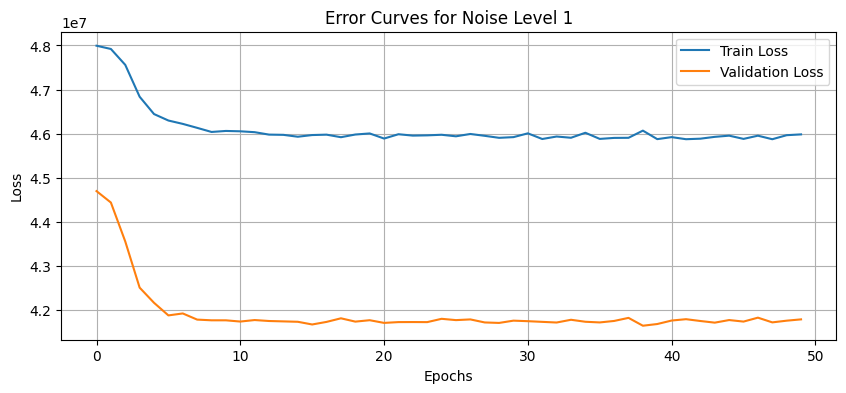


Entrenando para signal con noise level: 3


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Metrics for noise level 3:
Train Loss: 148252480.0000
Validation Loss: 178689056.0000
Mean Squared Error (MSE): 185002211.1162
Mean Absolute Error (MAE): 8003.9392
Root Mean Squared Error (RMSE): 13601.5518


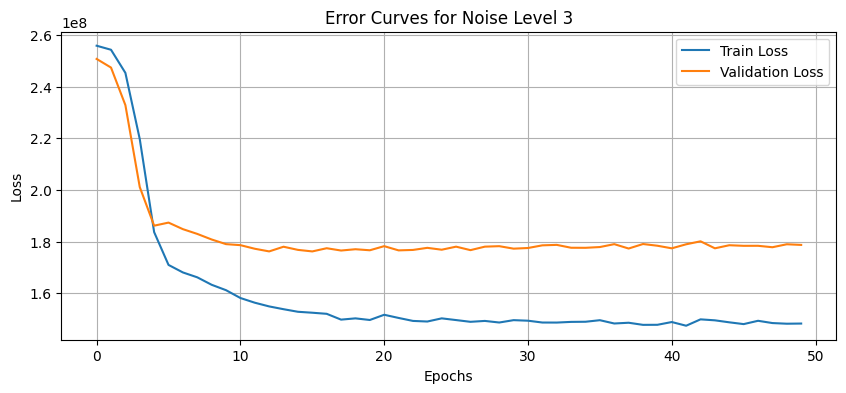


Final training metrics for all noise levels:
   noise_level   train_loss     val_loss           mse          mae  \
0          0.1   38967016.0   60631120.0  6.997937e+07  1024.713126   
1          0.3   39752956.0   55721228.0  7.593345e+07  1062.458005   
2          1.0   45981208.0   41780756.0  1.036542e+08  1592.020107   
3          3.0  148252480.0  178689056.0  1.850022e+08  8003.939187   

           rmse  
0   8365.367200  
1   8713.980155  
2  10181.072498  
3  13601.551791  


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Funciones de generación de señales y ruido
def noise_gaussian(mean, level_noise, size):
    noise = np.random.normal(mean, level_noise, size)
    return noise

def generate_signal():
    return np.sin(np.linspace(0, 10, M_points_signal))

# Parámetros de la señal
M_points_signal = 1024

# Generación de señales con diferentes niveles de ruido
signal_1 = generate_signal() + noise_gaussian(0, 0.1, M_points_signal)
signal_2 = generate_signal() + noise_gaussian(0, 0.3, M_points_signal)
signal_3 = generate_signal() + noise_gaussian(0, 1, M_points_signal)
signal_4 = generate_signal() + noise_gaussian(0, 3, M_points_signal)

signals = [signal_1, signal_2, signal_3, signal_4]

# Simulación de PSDs correspondientes (esto debería basarse en tu aplicación)
psds = [np.abs(np.fft.fft(signal))**2 for signal in signals]

# Inicialización de variables para almacenar resultados
training_metrics = []
noise_levels = [0.1, 0.3, 1, 3]

# Entrenamiento del modelo para cada señal
for i, signal in enumerate(signals):
    print(f"\nEntrenando para signal con noise level: {noise_levels[i]}")

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(signal.reshape(-1, 1), psds[i].reshape(-1, 1), test_size=0.2, random_state=42)

    # Construcción del modelo
    model = Sequential()
    model.add(Dense(512, input_shape=(1,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)  # verbose=0 para evitar el spam en la consola

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    # Guardar métricas
    training_metrics.append({
        'noise_level': noise_levels[i],
        'train_loss': train_loss,
        'val_loss': val_loss,
        'mse': mse,
        'mae': mae,
        'rmse': rmse
    })

    # Imprimir métricas
    print(f"Metrics for noise level {noise_levels[i]}:")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Graficar la curva de error
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Error Curves for Noise Level {noise_levels[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Convertir a DataFrame para mejor visualización
metrics_df = pd.DataFrame(training_metrics)

# Mostrar la tabla de métricas finales
print("\nFinal training metrics for all noise levels:")
print(metrics_df)



Entrenando para signal con noise level: 0.1
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/50 - Loss: 58287680.0000, Val Loss: 1050.2922, MSE: 1050.2921, MAE: 15.1566, RMSE: 32.4082
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 11/50 - Loss: 57807760.0000, Val Loss: 384530.6875, MSE: 384530.6998, MAE: 540.7327, RMSE: 620.1054
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50 - Loss: 57718664.0000, Val Loss: 590879.9375, MSE: 590879.8928, MAE: 610.0701, RMSE: 768.6871
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 31/50 - Loss: 57717248.0000, Val Loss: 662098.8750, MSE: 662098.9342, MAE: 641.9369, RMSE: 813.6946
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 41/50 - Loss: 57616876.0000, Val Loss: 546915.5625, MSE: 546915.5890, MAE: 563.4769, RMSE: 739.5374
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 50/50 - Loss: 57627852.0000, Val Loss: 628043.5625, MSE: 628043.5353, MAE: 592.5082, RMSE: 792.4920


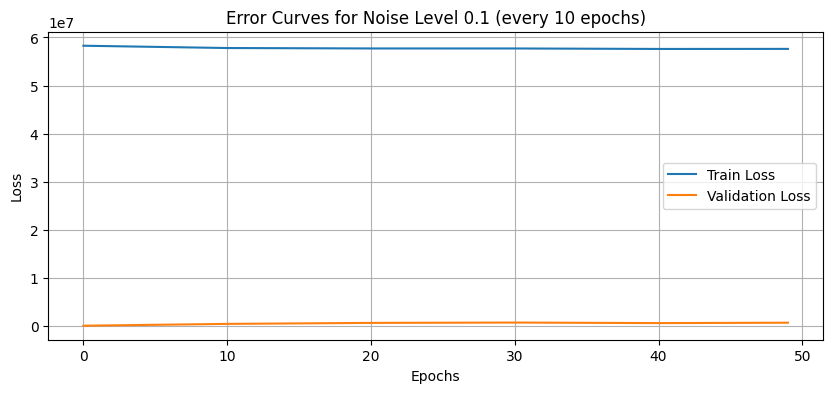


Entrenando para signal con noise level: 0.3


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/50 - Loss: 57812872.0000, Val Loss: 14991.3242, MSE: 14991.3240, MAE: 83.3583, RMSE: 122.4391
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
Epoch 11/50 - Loss: 57202408.0000, Val Loss: 418124.7500, MSE: 418124.7631, MAE: 552.7466, RMSE: 646.6257
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50 - Loss: 57171700.0000, Val Loss: 509903.5000, MSE: 509903.5033, MAE: 565.8002, RMSE: 714.0753
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 31/50 - Loss: 57131776.0000, Val Loss: 615278.5000, MSE: 615278.4882, MAE: 618.7394, RMSE: 784.3969
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 41/50 - Loss: 57129592.0000, Val Loss: 1019264.3125, MSE: 1019264.2765, MAE: 775.3978, RMSE: 1009.5862
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 50/50 - Loss: 57092376.0000, Val Loss: 661377.3750, MSE: 661377.4388, MAE: 626.9386, RMSE: 813.2512


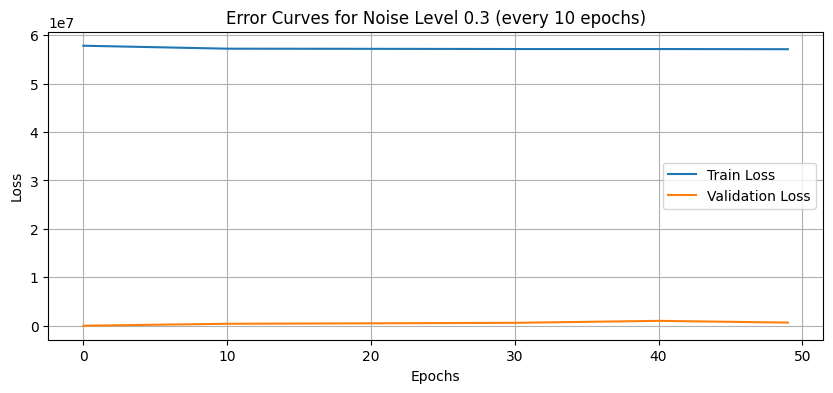


Entrenando para signal con noise level: 1


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 1/50 - Loss: 62519796.0000, Val Loss: 1864410.2500, MSE: 1864410.2049, MAE: 997.7102, RMSE: 1365.4341
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 11/50 - Loss: 59901284.0000, Val Loss: 1400700.8750, MSE: 1400700.7435, MAE: 979.3102, RMSE: 1183.5120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 21/50 - Loss: 59625660.0000, Val Loss: 1672948.2500, MSE: 1672948.3285, MAE: 1093.5956, RMSE: 1293.4250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 31/50 - Loss: 59715624.0000, Val Loss: 1694730.0000, MSE: 1694730.0359, MAE: 1115.4496, RMSE: 1301.8180
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 41/50 - Loss: 59519296.0000, Val Loss: 1629080.6250, MSE: 1629080.4881, MAE: 1092.0042, RMSE: 1276.3544
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 50/50 - Loss: 59679648.0000, Val Loss: 1484884.2500, MSE: 1484884.2719, MAE: 1032.0182, RMSE: 1218.5583


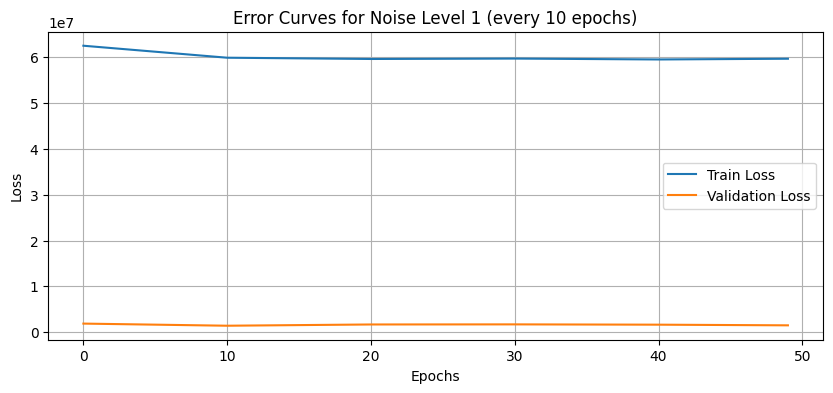


Entrenando para signal con noise level: 3


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 1/50 - Loss: 268573120.0000, Val Loss: 213376592.0000, MSE: 213376572.3667, MAE: 9874.3840, RMSE: 14607.4150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 11/50 - Loss: 178108176.0000, Val Loss: 123498448.0000, MSE: 123498442.7992, MAE: 7676.9298, RMSE: 11112.9853
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50 - Loss: 168179824.0000, Val Loss: 116596776.0000, MSE: 116596783.9420, MAE: 7707.6704, RMSE: 10797.9991
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 31/50 - Loss: 167459552.0000, Val Loss: 116006920.0000, MSE: 116006918.8503, MAE: 7694.8384, RMSE: 10770.6508
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 41/50 - Loss: 167189968.0000, Val Loss: 115739496.0000, MSE: 115739481.8742, MAE: 7605.9626, RMSE: 10758.2286
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 50/50 - Loss: 168186992.0000, Val Loss: 115754072.0000, MSE: 115754068.4322, MAE: 7604.6436, RMSE: 10758.9065


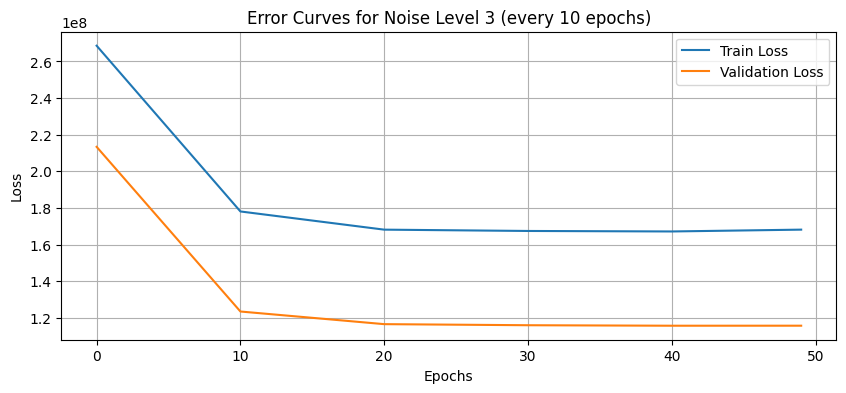


Training metrics every 10 epochs for all noise levels:
    epoch  noise_level   train_loss      val_loss           mse          mae  \
0       0          0.1   58287680.0  1.050292e+03  1.050292e+03    15.156623   
1      10          0.1   57807760.0  3.845307e+05  3.845307e+05   540.732731   
2      20          0.1   57718664.0  5.908799e+05  5.908799e+05   610.070135   
3      30          0.1   57717248.0  6.620989e+05  6.620989e+05   641.936874   
4      40          0.1   57616876.0  5.469156e+05  5.469156e+05   563.476941   
5      49          0.1   57627852.0  6.280436e+05  6.280435e+05   592.508222   
6       0          0.3   57812872.0  1.499132e+04  1.499132e+04    83.358314   
7      10          0.3   57202408.0  4.181248e+05  4.181248e+05   552.746601   
8      20          0.3   57171700.0  5.099035e+05  5.099035e+05   565.800180   
9      30          0.3   57131776.0  6.152785e+05  6.152785e+05   618.739435   
10     40          0.3   57129592.0  1.019264e+06  1.019264e+06 

In [25]:
from keras.callbacks import Callback
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Inicialización de variables para almacenar métricas por cada 10 epochs
metrics_by_epochs = []

# Callback personalizado que hereda de keras.callbacks.Callback
class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.history = {'loss': [], 'val_loss': [], 'mse': [], 'mae': [], 'rmse': []}
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0 or epoch == epochs - 1:
            self.history['loss'].append(logs['loss'])
            self.history['val_loss'].append(logs['val_loss'])

            # Predicción en el conjunto de prueba para métricas adicionales
            y_pred = self.model.predict(self.validation_data[0])
            mse = mean_squared_error(self.validation_data[1], y_pred)
            mae = mean_absolute_error(self.validation_data[1], y_pred)
            rmse = np.sqrt(mse)

            self.history['mse'].append(mse)
            self.history['mae'].append(mae)
            self.history['rmse'].append(rmse)
            self.epochs.append(epoch)

            # Guardar métricas
            metrics_by_epochs.append({
                'epoch': epoch,
                'noise_level': noise_levels[i],
                'train_loss': logs['loss'],
                'val_loss': logs['val_loss'],
                'mse': mse,
                'mae': mae,
                'rmse': rmse
            })

            print(f"Epoch {epoch + 1}/{epochs} - Loss: {logs['loss']:.4f}, Val Loss: {logs['val_loss']:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Entrenamiento del modelo para cada señal
for i, signal in enumerate(signals):
    print(f"\nEntrenando para signal con noise level: {noise_levels[i]}")

    # Dividir en conjunto de entrenamiento, validación y prueba
    X_train_full, X_test, y_train_full, y_test = train_test_split(signal.reshape(-1, 1), psds[i].reshape(-1, 1), test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    # Construcción del modelo
    model = Sequential()
    model.add(Dense(512, input_shape=(1,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Crear instancia del callback con datos de validación explícitos
    metrics_callback = MetricsCallback(validation_data=(X_val, y_val))

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=0, callbacks=[metrics_callback])

    # Graficar la curva de error cada 10 epochs
    plt.figure(figsize=(10, 4))
    plt.plot(metrics_callback.epochs, metrics_callback.history['loss'], label='Train Loss')
    plt.plot(metrics_callback.epochs, metrics_callback.history['val_loss'], label='Validation Loss')
    plt.title(f'Error Curves for Noise Level {noise_levels[i]} (every 10 epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Convertir a DataFrame para mejor visualización
metrics_by_epochs_df = pd.DataFrame(metrics_by_epochs)

# Mostrar la tabla de métricas finales cada 10 epochs
print("\nTraining metrics every 10 epochs for all noise levels:")
print(metrics_by_epochs_df)



Entrenando para signal con noise level: 0.1


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/50 - Loss: 58287416.0000, Val Loss: 1056.9088, MSE: 1056.9089, MAE: 15.3077, RMSE: 32.5101
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 11/50 - Loss: 57811952.0000, Val Loss: 334235.2812, MSE: 334235.2487, MAE: 502.4040, RMSE: 578.1308
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 21/50 - Loss: 57685668.0000, Val Loss: 546254.6875, MSE: 546254.6371, MAE: 598.1258, RMSE: 739.0904
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 31/50 - Loss: 57658900.0000, Val Loss: 615952.3750, MSE: 615952.3676, MAE: 599.8075, RMSE: 784.8263
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
Epoch 41/50 - Loss: 57630260.0000, Val Loss: 715442.6250, MSE: 715442.6239, MAE: 640.2107, RMSE: 845.8384
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 50/50 - Loss: 57577664.0000, Val Loss: 589488.1875, MSE: 589488.1869, MAE: 569.3866, RMSE: 767.7813


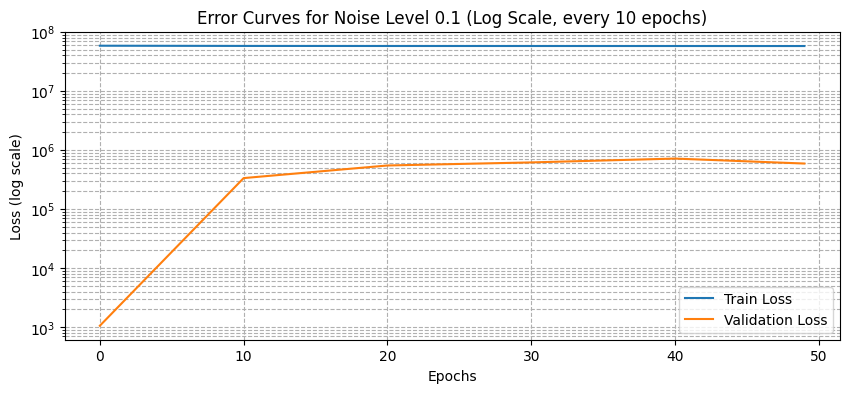


Entrenando para signal con noise level: 0.3


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/50 - Loss: 57812180.0000, Val Loss: 14976.7344, MSE: 14976.7347, MAE: 83.2945, RMSE: 122.3795
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 11/50 - Loss: 57219664.0000, Val Loss: 412044.2500, MSE: 412044.2637, MAE: 555.4278, RMSE: 641.9067
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50 - Loss: 57107932.0000, Val Loss: 570631.1250, MSE: 570631.1017, MAE: 605.9535, RMSE: 755.4013
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 31/50 - Loss: 57125004.0000, Val Loss: 525619.0000, MSE: 525619.0116, MAE: 572.7808, RMSE: 724.9959
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 41/50 - Loss: 57142736.0000, Val Loss: 836869.2500, MSE: 836869.2390, MAE: 714.9580, RMSE: 914.8056
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 50/50 - Loss: 57174484.0000, Val Loss: 546059.7500, MSE: 546059.7434, MAE: 578.1532, RMSE: 738.9586


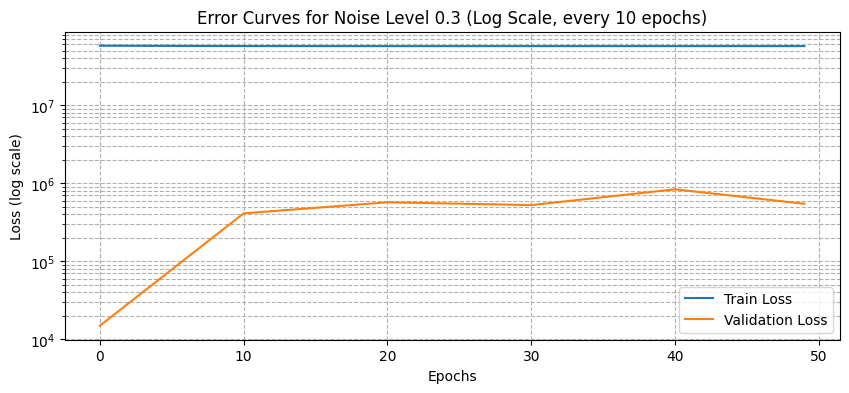


Entrenando para signal con noise level: 1


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch 1/50 - Loss: 62519708.0000, Val Loss: 1863396.0000, MSE: 1863396.0025, MAE: 997.2396, RMSE: 1365.0626
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
Epoch 11/50 - Loss: 59721748.0000, Val Loss: 1597037.8750, MSE: 1597038.0715, MAE: 1069.4022, RMSE: 1263.7397
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50 - Loss: 59659320.0000, Val Loss: 1724450.0000, MSE: 1724449.9866, MAE: 1124.0562, RMSE: 1313.1832
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 31/50 - Loss: 59572072.0000, Val Loss: 2210259.0000, MSE: 2210258.9695, MAE: 1280.4322, RMSE: 1486.6940
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 41/50 - Loss: 59651328.0000, Val Loss: 1998592.6250, MSE: 1998592.6583, MAE: 1225.5299, RMSE: 1413.7159
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 50/50 - Loss: 59650128.0000, Val Loss: 1828247.6250, MSE: 1828247.5446, MAE: 1160.9092, RMSE: 1352.1270


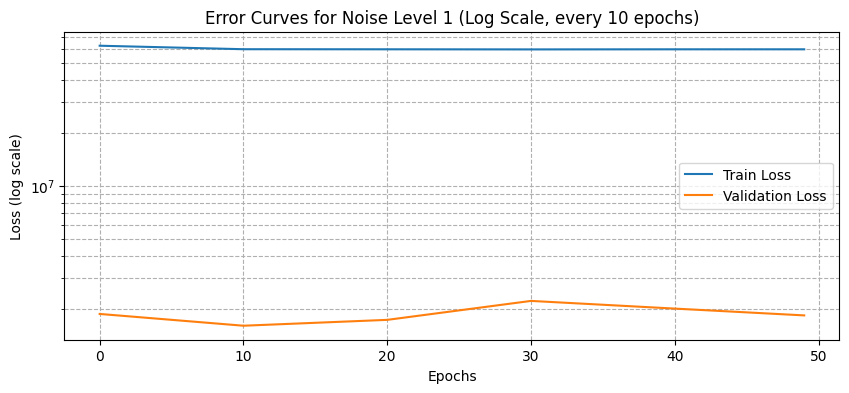


Entrenando para signal con noise level: 3


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/50 - Loss: 268586464.0000, Val Loss: 213369088.0000, MSE: 213369090.0504, MAE: 9874.0143, RMSE: 14607.1589
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 11/50 - Loss: 177744640.0000, Val Loss: 124539520.0000, MSE: 124539518.7547, MAE: 7702.6850, RMSE: 11159.7275
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50 - Loss: 168353072.0000, Val Loss: 117013456.0000, MSE: 117013459.1946, MAE: 7648.4143, RMSE: 10817.2760
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 31/50 - Loss: 167567584.0000, Val Loss: 116984408.0000, MSE: 116984402.8157, MAE: 7884.9131, RMSE: 10815.9328
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 41/50 - Loss: 167237952.0000, Val Loss: 115869184.0000, MSE: 115869192.4625, MAE: 7674.9639, RMSE: 10764.2553
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 50/50 - Loss: 166867712.0000, Val Loss: 115810544.0000, MSE: 115810535.9100, MAE: 7682.8854, RMSE: 10761.5304


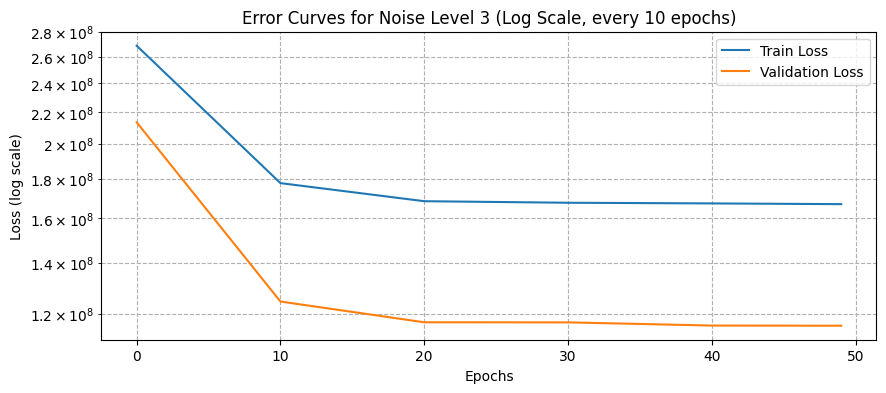


Training metrics every 10 epochs for all noise levels:
    epoch  noise_level   train_loss      val_loss           mse          mae  \
0       0          0.1   58287416.0  1.056909e+03  1.056909e+03    15.307747   
1      10          0.1   57811952.0  3.342353e+05  3.342352e+05   502.403975   
2      20          0.1   57685668.0  5.462547e+05  5.462546e+05   598.125798   
3      30          0.1   57658900.0  6.159524e+05  6.159524e+05   599.807509   
4      40          0.1   57630260.0  7.154426e+05  7.154426e+05   640.210672   
5      49          0.1   57577664.0  5.894882e+05  5.894882e+05   569.386603   
6       0          0.3   57812180.0  1.497673e+04  1.497673e+04    83.294483   
7      10          0.3   57219664.0  4.120442e+05  4.120443e+05   555.427771   
8      20          0.3   57107932.0  5.706311e+05  5.706311e+05   605.953452   
9      30          0.3   57125004.0  5.256190e+05  5.256190e+05   572.780807   
10     40          0.3   57142736.0  8.368692e+05  8.368692e+05 

In [26]:
from keras.callbacks import Callback
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Inicialización de variables para almacenar métricas por cada 10 epochs
metrics_by_epochs = []

# Callback personalizado que hereda de keras.callbacks.Callback
class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.history = {'loss': [], 'val_loss': [], 'mse': [], 'mae': [], 'rmse': []}
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0 or epoch == epochs - 1:
            self.history['loss'].append(logs['loss'])
            self.history['val_loss'].append(logs['val_loss'])

            # Predicción en el conjunto de prueba para métricas adicionales
            y_pred = self.model.predict(self.validation_data[0])
            mse = mean_squared_error(self.validation_data[1], y_pred)
            mae = mean_absolute_error(self.validation_data[1], y_pred)
            rmse = np.sqrt(mse)

            self.history['mse'].append(mse)
            self.history['mae'].append(mae)
            self.history['rmse'].append(rmse)
            self.epochs.append(epoch)

            # Guardar métricas
            metrics_by_epochs.append({
                'epoch': epoch,
                'noise_level': noise_levels[i],
                'train_loss': logs['loss'],
                'val_loss': logs['val_loss'],
                'mse': mse,
                'mae': mae,
                'rmse': rmse
            })

            print(f"Epoch {epoch + 1}/{epochs} - Loss: {logs['loss']:.4f}, Val Loss: {logs['val_loss']:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Entrenamiento del modelo para cada señal
for i, signal in enumerate(signals):
    print(f"\nEntrenando para signal con noise level: {noise_levels[i]}")

    # Dividir en conjunto de entrenamiento, validación y prueba
    X_train_full, X_test, y_train_full, y_test = train_test_split(signal.reshape(-1, 1), psds[i].reshape(-1, 1), test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    # Construcción del modelo
    model = Sequential()
    model.add(Dense(512, input_shape=(1,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Crear instancia del callback con datos de validación explícitos
    metrics_callback = MetricsCallback(validation_data=(X_val, y_val))

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=0, callbacks=[metrics_callback])

    # Graficar la curva de error cada 10 epochs en escala logarítmica
    plt.figure(figsize=(10, 4))
    plt.semilogy(metrics_callback.epochs, metrics_callback.history['loss'], label='Train Loss')
    plt.semilogy(metrics_callback.epochs, metrics_callback.history['val_loss'], label='Validation Loss')
    plt.title(f'Error Curves for Noise Level {noise_levels[i]} (Log Scale, every 10 epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (log scale)')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# Convertir a DataFrame para mejor visualización
metrics_by_epochs_df = pd.DataFrame(metrics_by_epochs)

# Mostrar la tabla de métricas finales cada 10 epochs
print("\nTraining metrics every 10 epochs for all noise levels:")
print(metrics_by_epochs_df)
